In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
basedir = '/Users/bono/demo_projects/weather_stocks/'
# file = basedir+'data/df_clean.pkl'
file = basedir+'data/df_all.pkl'
infile = open(file,'rb')
df_all = pickle.load(infile)
infile.close()

In [3]:
df_all['temp_date'] = df_all.index
df_all["change"] = df_all['Close'] -  df_all['Open']

In [5]:
import sys
sys.path.append(basedir+"src") # go to parent dir
from motion_characterizer import *

In [6]:
df_new = remove_stock_outliers(df_all)

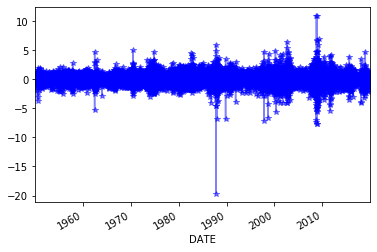

In [7]:
df_all['PercentChange'].plot(color="blue",alpha=0.5,style='*-')


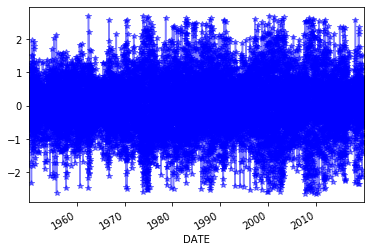

In [8]:
df_new['PercentChange'].plot(color="blue",alpha=0.5,style='*-')

In [9]:
def split_types(df):
    df_good = df.copy()
    mask = df["n_good"] == 1
    df_good = df[mask]
    
    df_bad = df.copy()
    mask = df["n_bad"] == 1
    df_bad = df[mask]
    return df_good,df_bad


In [10]:
df_good,df_bad = split_types(df_all)

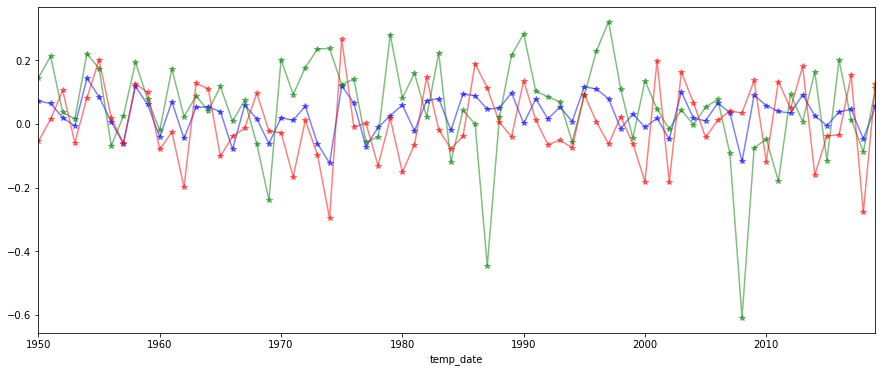

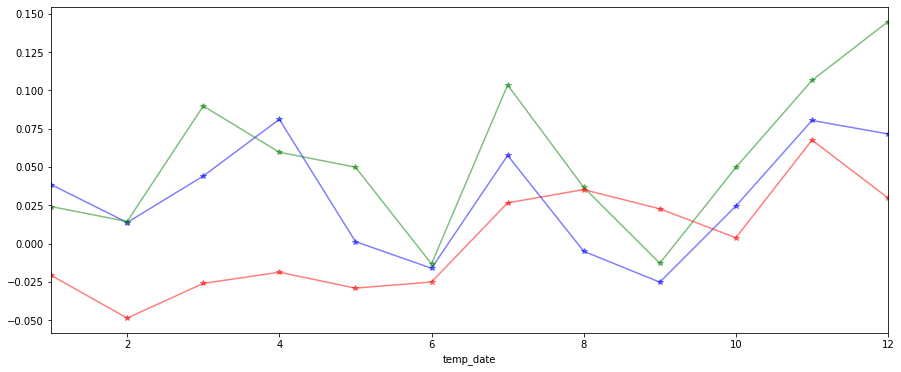

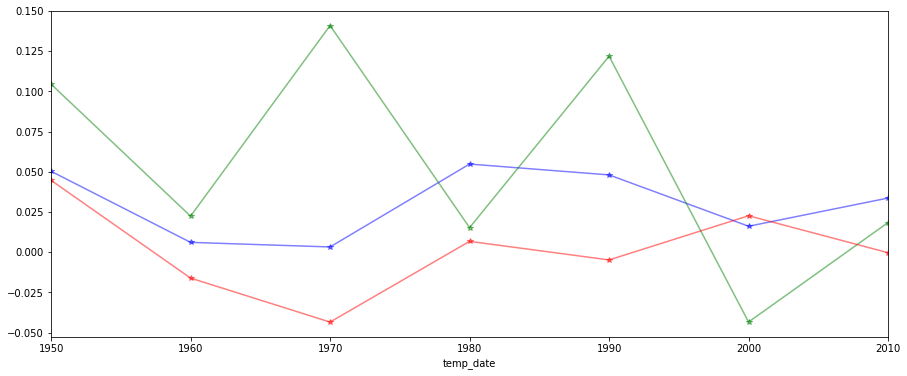

In [11]:
plt.figure(figsize=(15, 6))
df_all['PercentChange'].groupby(df_all['temp_date'].dt.year).mean().plot(color="blue",alpha=0.5,style='*-')
df_good['PercentChange'].groupby(df_good['temp_date'].dt.year).mean().plot(color="green",alpha=0.5,style='*-')
df_bad['PercentChange'].groupby(df_bad['temp_date'].dt.year).mean().plot(color="red",alpha=0.5,style='*-')

plt.figure(figsize=(15, 6))
df_all['PercentChange'].groupby(df_all['temp_date'].dt.month).mean().plot(color="blue",alpha=0.5,style='*-')
df_good['PercentChange'].groupby(df_good['temp_date'].dt.month).mean().plot(color="green",alpha=0.5,style='*-')
df_bad['PercentChange'].groupby(df_bad['temp_date'].dt.month).mean().plot(color="red",alpha=0.5,style='*-')


plt.figure(figsize=(15, 6))

df_all['PercentChange'].groupby((df_all['temp_date'].dt.year//10)*10).mean().plot(color="blue",alpha=0.5,style='*-')
df_good['PercentChange'].groupby((df_good['temp_date'].dt.year//10)*10).mean().plot(color="green",alpha=0.5,style='*-')
df_bad['PercentChange'].groupby((df_bad['temp_date'].dt.year//10)*10).mean().plot(color="red",alpha=0.5,style='*-')



In [19]:
df_all_clean = remove_stock_outliers(df_all)
df_good_clean,df_bad_clean = split_types(df_all_clean)

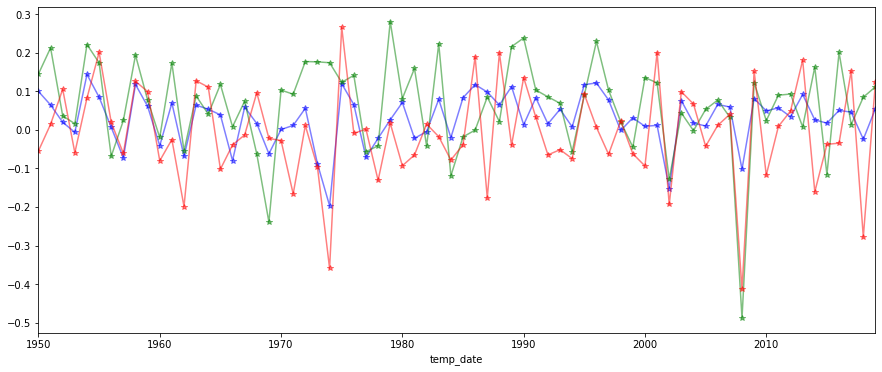

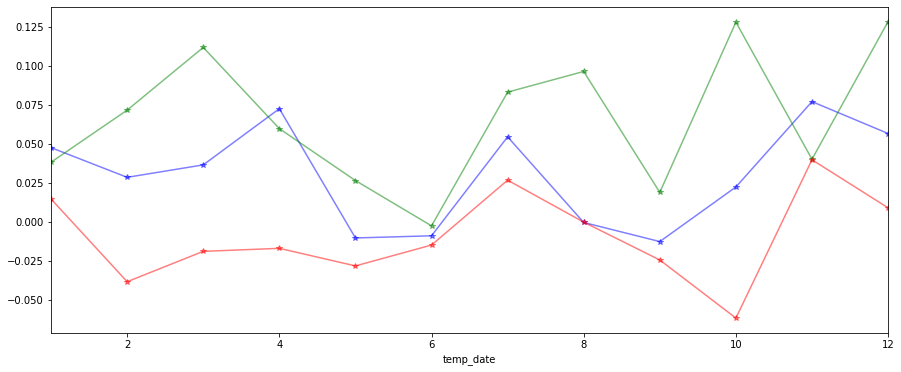

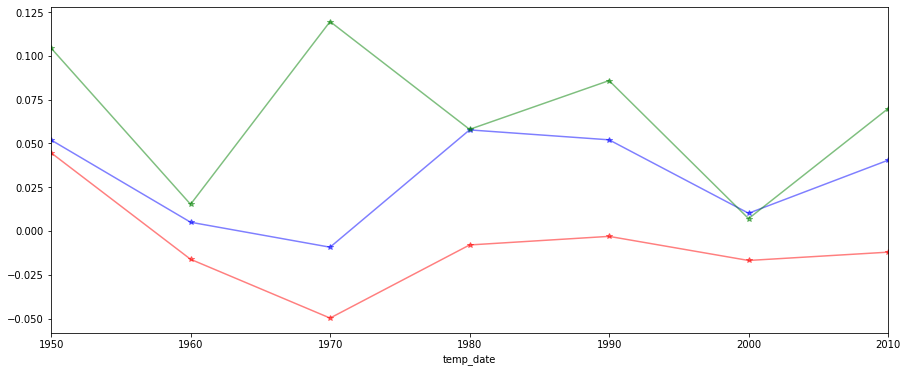

In [20]:
plt.figure(figsize=(15, 6))
df_all_clean['PercentChange'].groupby(df_all_clean['temp_date'].dt.year).mean().plot(color="blue",alpha=0.5,style='*-')
df_good_clean['PercentChange'].groupby(df_good_clean['temp_date'].dt.year).mean().plot(color="green",alpha=0.5,style='*-')
df_bad_clean['PercentChange'].groupby(df_bad_clean['temp_date'].dt.year).mean().plot(color="red",alpha=0.5,style='*-')

plt.figure(figsize=(15, 6))
df_all_clean['PercentChange'].groupby(df_all_clean['temp_date'].dt.month).mean().plot(color="blue",alpha=0.5,style='*-')
df_good_clean['PercentChange'].groupby(df_good_clean['temp_date'].dt.month).mean().plot(color="green",alpha=0.5,style='*-')
df_bad_clean['PercentChange'].groupby(df_bad_clean['temp_date'].dt.month).mean().plot(color="red",alpha=0.5,style='*-')


plt.figure(figsize=(15, 6))

df_all_clean['PercentChange'].groupby((df_all_clean['temp_date'].dt.year//10)*10).mean().plot(color="blue",alpha=0.5,style='*-')
df_good_clean['PercentChange'].groupby((df_good_clean['temp_date'].dt.year//10)*10).mean().plot(color="green",alpha=0.5,style='*-')
df_bad_clean['PercentChange'].groupby((df_bad_clean['temp_date'].dt.year//10)*10).mean().plot(color="red",alpha=0.5,style='*-')




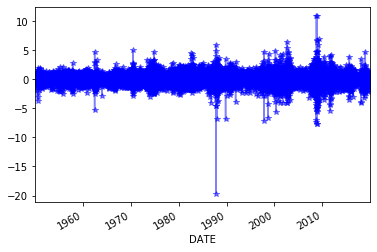

In [12]:
df_all['PercentChange'].plot(color="blue",alpha=0.5,style='*-')


In [13]:
df_test = df_all.copy()
mask = df_test["PercentChange"] < 800000
df_test = df_test[mask]
df_test['PercentChange']



DATE
1950-01-03   -0.619600
1950-01-04    0.658654
1950-01-05    0.184820
1950-01-06    0.194446
1950-01-09    0.019805
                ...   
2019-12-24   -0.199916
2019-12-26    0.287075
2019-12-27   -0.104899
2019-12-30   -0.672206
2019-12-31    0.435687
Name: PercentChange, Length: 17613, dtype: float64

In [14]:
df_all.shape

(17613, 79)

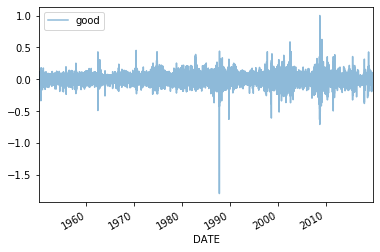

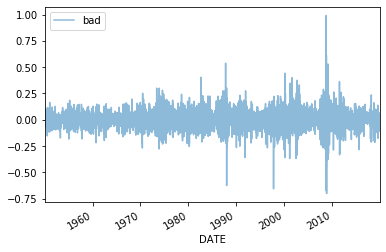

In [15]:
df = df_all.copy()
mask = df["n_good"] >= 1
df = df[mask]
df.plot(y='Change_NORM',alpha=0.5,label="good")

df = df_all.copy()
mask = df_all["n_bad"] >= 1
df = df_all[mask]

df.plot(y='Change_NORM',alpha=0.5,label="bad")

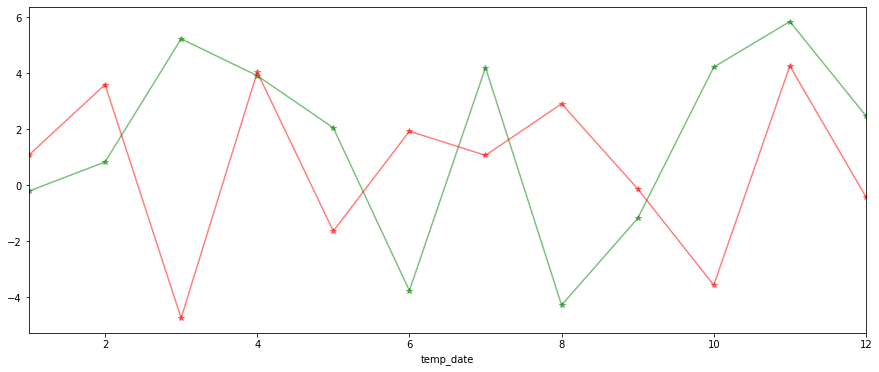

In [16]:
plt.figure(figsize=(15, 6))


df = df_all.copy()
mask = df["n_good"] >= 1
df = df[mask]
df['change'].groupby(df['temp_date'].dt.month).mean().plot(color="green",alpha=0.5,style='*-')

df = df_all.copy()
mask = df["n_bad"] >= 1
df = df[mask]
df['change'].groupby(df['temp_date'].dt.month).mean().plot(color="red",alpha=0.5,style='*-')

In [17]:
bad_means[i] = df['PercentChange'].mean()
bad_errs[i] = df['PercentChange'].sem()

NameError: name 'bad_means' is not defined

# Write a function that models change in stock as a function recent weather flags

In [22]:
def measure_slope(df,start_year,end_year,n_pts=8):
    
    start_day = str(start_year)+"-01-01"
    end_day = str(end_year)+"-12-31"
    
    mask = (df.index > start_day) & (df.index <= end_day)
    sub_df = df[mask]
    
    
    good_means = np.zeros(n_pts)
    good_errs = np.zeros(n_pts)
    bad_means = np.zeros(n_pts)
    bad_errs = np.zeros(n_pts)
    days = np.zeros(n_pts)
    for i in range(n_pts):
        days[i] = i
        #mean for number of good days
        df = sub_df[df_all['n_good'] == i]
        good_means[i] = df['PercentChange'].mean()
        good_errs[i] = df['PercentChange'].sem()

        #mean for number of bad days
        df = sub_df[df_all['n_bad'] == i]
        bad_means[i] = df['PercentChange'].mean()
        bad_errs[i] = df['PercentChange'].sem()

#     plain plot
    plt.figure(figsize=(10, 6)) 
    plt.grid()
    fig = plt.errorbar(days, good_means, yerr=good_errs, label='good weather streaks',fmt='o')
    fig = plt.errorbar(days, bad_means, yerr=bad_errs, label='bad weather streaks',fmt='o')
    plt.ylabel('avg daily percent change in price', fontsize=18)
    plt.xlabel('number of days in streak', fontsize=16)
    plt.legend()
    
    #plot with fit
    xp = np.linspace(0, n_pts - 1, 100)
    z = np.polyfit(days, good_means, deg=1, w=1.0/good_errs**2)
    good_p = np.poly1d(z)
    z = np.polyfit(days, bad_means, deg=1,w=1.0/bad_errs**2)
    bad_p = np.poly1d(z)
    plt.figure(figsize=(10, 6)) 
    plt.grid()
    fig = plt.errorbar(days, good_means, yerr=good_errs, label='good weather streaks',color='C0',ls='none',fmt='o')
    fig = plt.errorbar(days, bad_means, yerr=bad_errs, label='bad weather streaks',color='C1',ls='none',fmt='o')
    fig = plt.plot(xp, good_p(xp), '--', label='good day fit',color='C0')
    fig = plt.plot(xp, bad_p(xp), '--', label='bad day fit',color='C1')
    plt.ylabel('avg daily change in price', fontsize=18)
    plt.xlabel('number of days in streak', fontsize=16)
    plt.legend()
    
    
    

# Look at all the data together

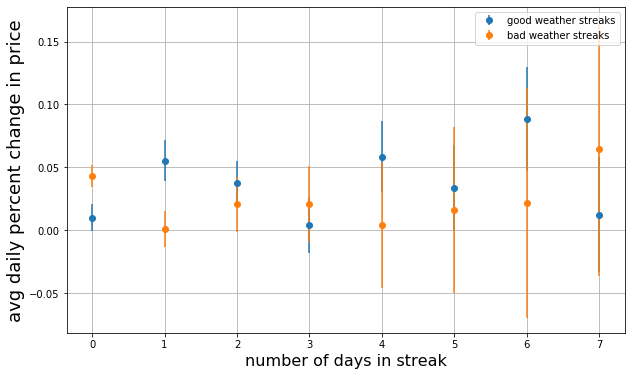

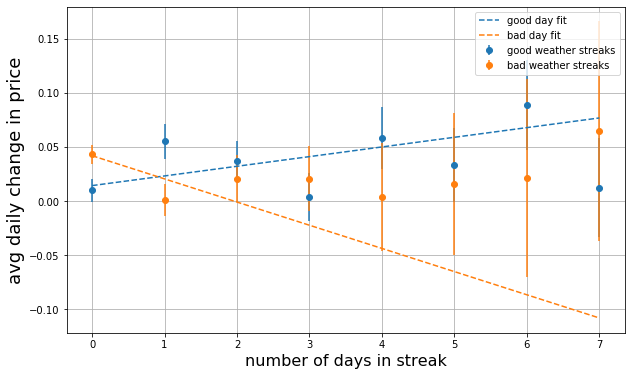

In [23]:
measure_slope(df_all,1940,2020)

# Look at the data, seperated by decade

In [ ]:
for start_year in range(1950,2020,10):
    end_year = start_year + 9
    print(start_year,end_year)
    measure_slope(df_all,start_year,end_year)

# Just look if you are in a good streak or a bad streak

In [ ]:
df_all["good"] = (df_all["n_good"] >= 1)
df_all["bad"] = (df_all["n_bad"] >= 1)
df_all["no_good"] = (df_all["n_good"] == 0)
df_all["no_bad"] = (df_all["n_bad"] == 0)

In [ ]:
plt.scatter(df_all['good'], df_all['PercentChange'],alpha=0.2)